<a href="https://colab.research.google.com/github/JLuceroVasquez/regresion-lineal-tecnicas-avanzadas-de-modelado/blob/main/notebook-de-clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal 2</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando requerimientos
* Biblioteca [Pandas](https://pandas.pydata.org/).
* Biblioteca [seaborn](https://seaborn.pydata.org/).
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [8]:
#Para el tratamiento numérico de datos
import pandas as pd
import numpy as np

#Para el análisis gráfico de los datos
import seaborn as sns
import matplotlib.pyplot as plt

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [2]:
#Detectar el encode
import chardet

with open('/content/dataset.csv','rb') as f:
  diccionario = chardet.detect(f.read())
  encode = diccionario['encoding']

print(encode)

ascii


## Ver los datos

In [4]:
#Se importan los datos y verifica sus columnas
url = 'https://github.com/JLuceroVasquez/regresion-lineal-tecnicas-avanzadas-de-modelado/raw/refs/heads/main/dataset.csv'
datos = pd.read_csv(url, sep=';', encoding='ascii')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Playa     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


## Verificando el tamaño del dataset

In [5]:
datos.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos
Se observa una gran distancia entre los valores mínimos y máximos de las variables: Valor y Area. Lo cual sugiere una distribución asimétrica de los datos que deberá comprobarse antes de tratar datos considerados valores extremos (outliers).


In [6]:
datos.describe()

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.593209e+05,121.944800,3.021920,0.497160
std,3.481089e+05,90.536969,3.170933,0.291355
min,1.386300e+04,16.000000,0.000000,0.000331
25%,8.502800e+04,70.000000,0.438417,0.238640
50%,1.515710e+05,93.000000,1.476958,0.503260
75%,2.939000e+05,146.000000,5.605379,0.747737
max,4.621072e+06,2000.000000,17.962942,0.999987


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

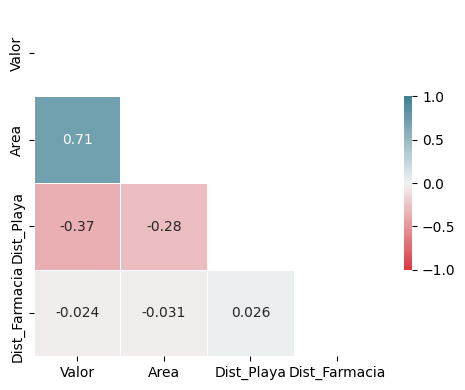

In [10]:
#Se crea la matriz de correlación
corr_datos = datos.corr().round(4)

mascara = np.zeros_like(corr_datos, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(6, 4.5))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr_datos, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Configuración del formato de los gráficos

In [11]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('whitegrid')


## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

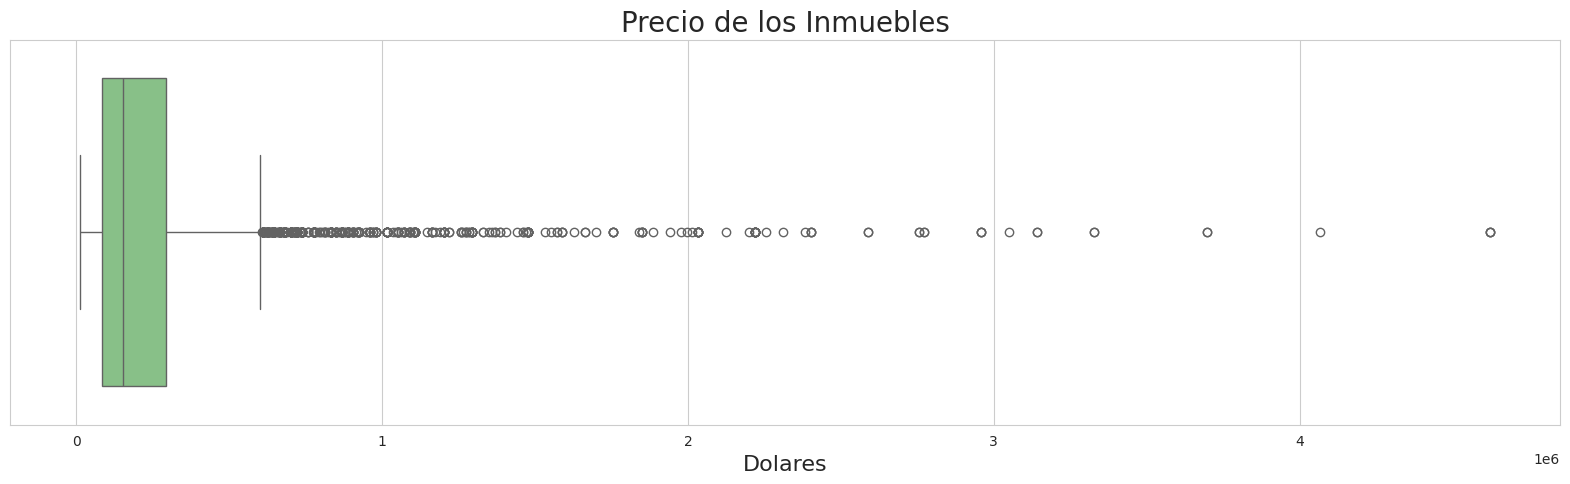

In [15]:
ax = sns.boxplot(data=datos, x='Valor')
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
plt.show()

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

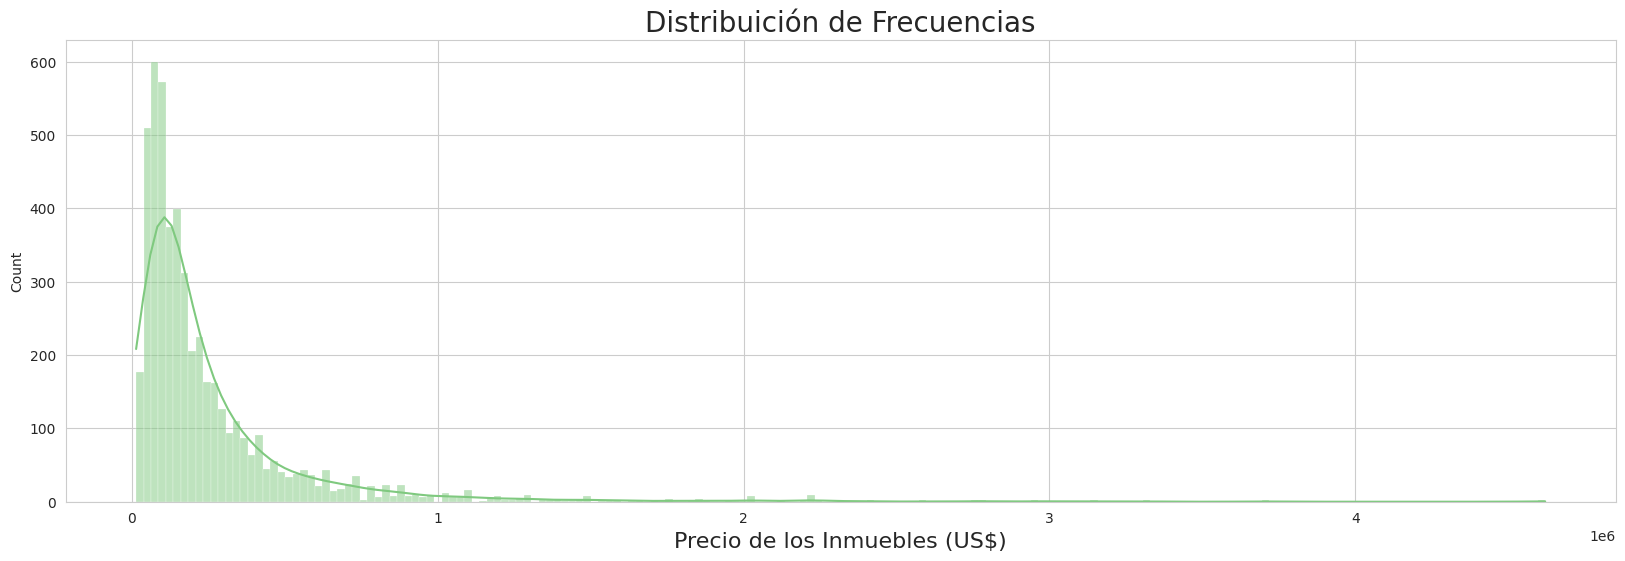

In [16]:
ax = sns.histplot(data= datos, x='Valor', kde=True)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
plt.show()

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

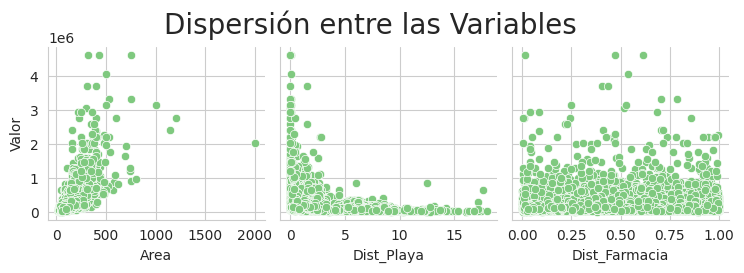

In [18]:
ax= sns.pairplot(data=datos, x_vars=['Area', 'Dist_Playa', 'Dist_Farmacia'],
             y_vars='Valor')

ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)

plt.show()

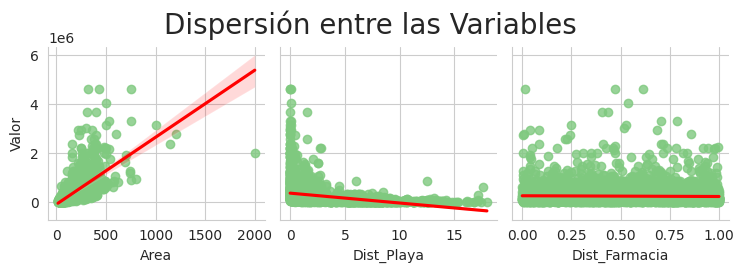

In [21]:
ax = sns.pairplot(data=datos, x_vars=['Area', 'Dist_Playa', 'Dist_Farmacia'],
             y_vars='Valor', kind='reg', plot_kws={'line_kws': {'color': 'red'}})

ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)

plt.show()

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

## Distribuición de frecuencias de la variable *dependiente transformada* (y)

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

In [ ]:

ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

## Creando los datasets de entrenamiento y de prueba

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

## Estimando el modelo con statsmodels

# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

## Creando los datasets de entrenamiento y de prueba

## Estimando el modelo con el statsmodels

## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando la clase *LinearRegression()*

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

## Generando predicción puntual

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

## Creando un simulador simple

# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

## Confirmando el orden de las variables explicativas en el DataFrame

## Creando una lista de nombres de las variables del modelo

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

## Obteniendo los residuos

## Graficando la distribuición de frecuencias de los residuos

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax